In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('winequalityN.csv')

In [3]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

Limpieza de variables numéricas
===

In [4]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [5]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

In [6]:
# Verificacion de la columna type
wine.loc[:,["type"]].value_counts()

type 
white    4898
red      1599
dtype: int64

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [10]:
# Verificación de las columnas validas de valores grandes, se usará un umbral de 0.8
cols_valids = []
cols_many_level = []
cols_one_level  = []

size = wine.shape[0]
umbral = 0.8

for c in cols:
    level = wine.loc[:,c].drop_duplicates().shape[0]
    if (level/size) >= umbral:
        cols_many_levels.append(c)
    elif level == 1:
        cols_one_level.append(c)
    else:
        cols_valids.append(c)

In [11]:
#Columnas Validas
cols_valids

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Al haber hecho un análisis de los boxplot de cada uno de las casillas numéricas se encontró que las que tienen valores atípicos son: 
- free sulfur dioxide
- total sulfur dioxide
- alcohol (poco)
- quality

{'whiskers': [<matplotlib.lines.Line2D at 0x1c09506a850>,
 'caps': [<matplotlib.lines.Line2D at 0x1c09506aeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c09506a340>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0950713d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0950716a0>],
 'means': []}

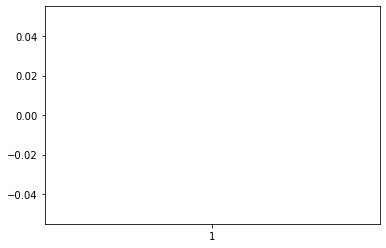

In [12]:
plt.boxplot(wine["sulphates"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c096215250>,
 'caps': [<matplotlib.lines.Line2D at 0x1c096215820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0961fbd60>],
 'medians': [<matplotlib.lines.Line2D at 0x1c096215dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0962230d0>],
 'means': []}

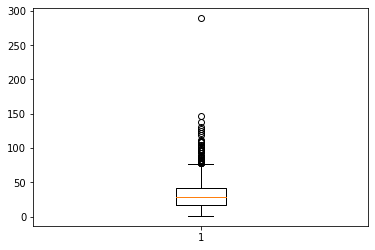

In [13]:
plt.boxplot(wine["free sulfur dioxide"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c09627a790>,
 'caps': [<matplotlib.lines.Line2D at 0x1c09627ad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c09627a5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c096288310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0962885e0>],
 'means': []}

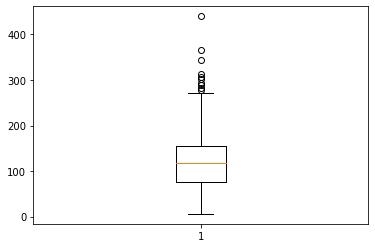

In [14]:
plt.boxplot(wine["total sulfur dioxide"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0962e20d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0962e2670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0962d3ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0962e2c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0962e2ee0>],
 'means': []}

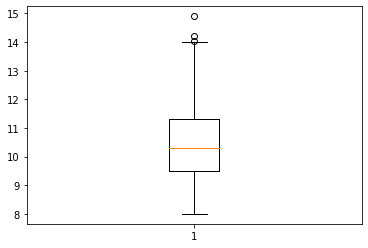

In [15]:
plt.boxplot(wine["alcohol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0963408e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c096340e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c096340700>],
 'medians': [<matplotlib.lines.Line2D at 0x1c096350460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c096350730>],
 'means': []}

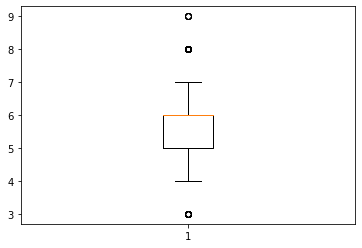

In [16]:
plt.boxplot(wine["quality"])

La estratificación si conviene hacerla con la columna type, debido que es la variable categórica que tenemos, por lo tanto se va a evaluar junto la columna quality y free sulfur dioxide

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

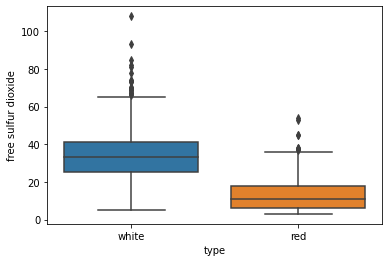

In [17]:
sns.boxplot(data = wine.loc[ (wine['quality'] == 7), : ], x= 'type', y ='free sulfur dioxide' )

In [18]:
limit_b = wine.loc[(wine["type"] == "white") & (wine["quality"] == 7), ["free sulfur dioxide"]]
limit_b

,free sulfur dioxide
13,48.0
15,28.0
21,19.0
29,37.0
45,38.0
...,...
4870,29.0
4876,34.0
4886,45.0
4887,5.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c0964287c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c096428d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0964284f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c096438340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c096438640>],
 'means': []}

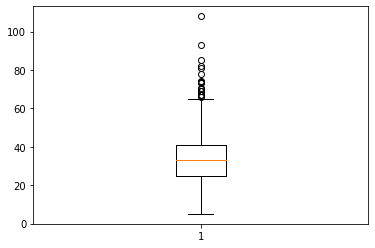

In [19]:
plt.boxplot(limit_b)

In [20]:
# Calculo del primer cuartile 
q1 = np.quantile(limit_b,0.25)
q1

25.0

In [21]:
# Calculo del tercer cuartile 
q3 = np.quantile(limit_b,0.75)
q3

41.0

In [22]:
# Calculo del segundo cuartile 
q2 = np.median(limit_b)
q2

33.0

In [23]:
#Calculo del iqr
iqr = q3 - q1
iqr

16.0

In [24]:
# Veremos los valores atípicos superiores
upper = q3 + (1.5*iqr)
upper

65.0

In [25]:
# Veremos los valores atípicos inferiores 
lower = q1 - (1.5*iqr)
lower

1.0

Una vez encontrados los valores superiores e inferiores se empezará con la estratificación, con el quality = 6

Estratificación
---

In [26]:
dfq1 = wine.loc[:,["type", "quality", "free sulfur dioxide"]].groupby(["type", "quality"], as_index = False).quantile(0.25)
dfq1.columns = ["type", "quality", "fsd 1"]
dfq1

,type,quality,fsd 1
0,red,3,5.00
1,red,4,6.00
2,red,5,9.00
3,red,6,8.00
4,red,7,6.00
5,red,8,6.00
6,white,3,13.25
7,white,4,9.00
8,white,5,22.00
9,white,6,24.00


In [27]:
dfq3 = wine.loc[:,["type", "quality", "free sulfur dioxide"]].groupby(["type", "quality"], as_index = False).quantile(0.75)
dfq3.columns = ["type", "quality", "fsd 3"]
dfq3

,type,quality,fsd 3
0,red,3,14.5
1,red,4,15.0
2,red,5,23.0
3,red,6,21.0
4,red,7,18.0
5,red,8,16.5
6,white,3,47.5
7,white,4,30.5
8,white,5,50.0
9,white,6,46.0


In [28]:
dfq2 = wine.loc[:,["type", "quality", "free sulfur dioxide"]].groupby(["type", "quality"], as_index = False).quantile(0.50)
dfq2.columns = ["type", "quality", "fsd 2"]
dfq2

,type,quality,fsd 2
0,red,3,6.0
1,red,4,11.0
2,red,5,15.0
3,red,6,14.0
4,red,7,11.0
5,red,8,7.5
6,white,3,33.5
7,white,4,18.0
8,white,5,35.0
9,white,6,34.0


In [29]:
df_iqr = dfq1.merge(dfq3, on = ["type", "quality"], how = "inner").merge(dfq2, on = ["type", "quality"], how = "inner")
df_iqr["IQR"] = df_iqr.apply(lambda r: r["fsd 3"] - r["fsd 1"], axis = 1)
df_iqr["Upper"] = df_iqr.apply(lambda r: r["fsd 3"] + 1.5*r["IQR"], axis = 1)
df_iqr["Lower"] = df_iqr.apply(lambda r: r["fsd 1"] - 1.5*r["IQR"], axis = 1)
df_iqr

,type,quality,fsd 1,fsd 3,fsd 2,IQR,Upper,Lower
0,red,3,5.00,14.5,6.0,9.50,28.750,-9.250
1,red,4,6.00,15.0,11.0,9.00,28.500,-7.500
2,red,5,9.00,23.0,15.0,14.00,44.000,-12.000
3,red,6,8.00,21.0,14.0,13.00,40.500,-11.500
4,red,7,6.00,18.0,11.0,12.00,36.000,-12.000
5,red,8,6.00,16.5,7.5,10.50,32.250,-9.750
6,white,3,13.25,47.5,33.5,34.25,98.875,-38.125
7,white,4,9.00,30.5,18.0,21.50,62.750,-23.250
8,white,5,22.00,50.0,35.0,28.00,92.000,-20.000
9,white,6,24.00,46.0,34.0,22.00,79.000,-9.000


In [30]:
wine_t = wine.merge(df_iqr, on = ["type", "quality"], how = "left").copy()
wine_t.shape

(6497, 19)

In [31]:
def getFsd(r): 
    if((r["free sulfur dioxide"] <= r["Lower"]) or (r["free sulfur dioxide"] >= r["Upper"])):
        return r["fsd 2"]
    else:
        return r["free sulfur dioxide"]

Se mostrará el dataset generado por el merge

In [32]:
wine_t["New_Fsd"] = wine_t.apply(lambda r: getFsd(r), axis = 1)
wine_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fsd 1,fsd 3,fsd 2,IQR,Upper,Lower,New_Fsd
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,24.0,46.0,34.0,22.0,79.0,-9.0,45.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,24.0,46.0,34.0,22.0,79.0,-9.0,14.0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,24.0,46.0,34.0,22.0,79.0,-9.0,30.0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,24.0,46.0,34.0,22.0,79.0,-9.0,47.0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,24.0,46.0,34.0,22.0,79.0,-9.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,9.0,23.0,15.0,14.0,44.0,-12.0,32.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,8.0,21.0,14.0,13.0,40.5,-11.5,39.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,8.0,21.0,14.0,13.0,40.5,-11.5,29.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,9.0,23.0,15.0,14.0,44.0,-12.0,32.0


Comparación 
---

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

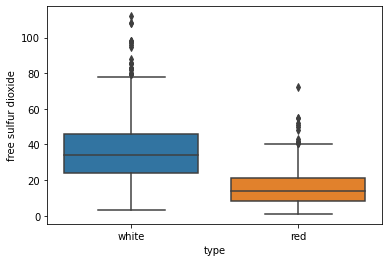

In [33]:
# Sin estratificar
sns.boxplot(data = wine.loc[ (wine['quality'] == 6), : ], x= 'type', y ='free sulfur dioxide' )

<AxesSubplot:xlabel='type', ylabel='New_Fsd'>

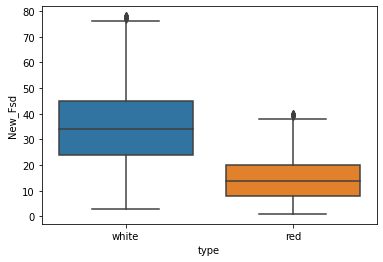

In [34]:
# Estratificado
sns.boxplot(data = wine_t.loc[ (wine_t['quality'] == 6), : ], x= 'type', y ='New_Fsd' )

PCA
===

En este caso se hace uso del PCA solo con las columnas: 
- free sulfur dioxide
- total sulfur dioxide

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
grados = wine.loc[:,["free sulfur dioxide","total sulfur dioxide"]]
grados

,free sulfur dioxide,total sulfur dioxide
0,45.0,170.0
1,14.0,132.0
2,30.0,97.0
3,47.0,186.0
4,47.0,186.0
...,...,...
6492,32.0,44.0
6493,39.0,51.0
6494,29.0,40.0
6495,32.0,44.0


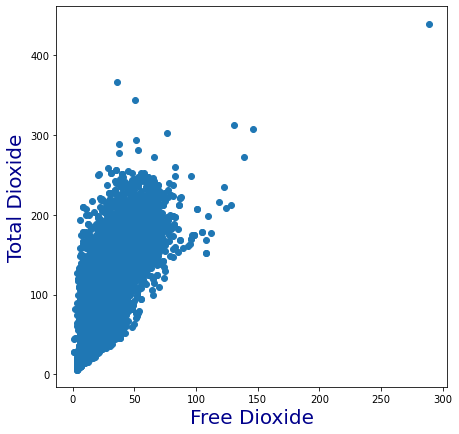

In [37]:
fig = plt.figure(figsize = (7,7))
plt.scatter(wine["free sulfur dioxide"], wine["total sulfur dioxide"])
plt.xlabel("Free Dioxide", fontsize = 20, color = "darkblue")
plt.ylabel("Total Dioxide", fontsize = 20, color = "darkblue")
plt.show()

Se hará el análisis entre el pH de los vinos y su nivel de alcohol

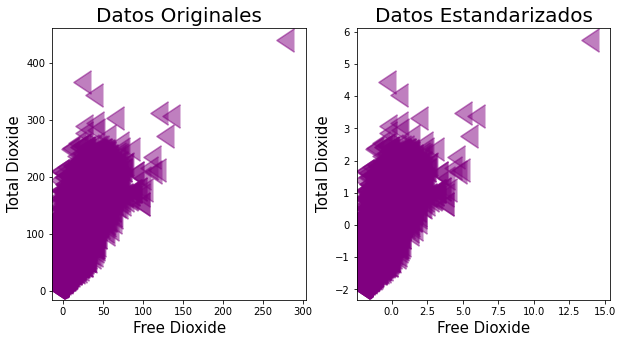

In [38]:
# Estandarización de los datos 

#Código de visualización
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title("Datos Originales", fontsize = 20)
ax1.scatter(wine["free sulfur dioxide"], wine["total sulfur dioxide"], marker = 8, s = 550, color = "purple", alpha = 0.5)
ax1.set_xlabel("Free Dioxide", fontsize = 15)
ax1.set_ylabel("Total Dioxide", fontsize = 15)

# Estandarización de los datos
grados = pd.DataFrame(StandardScaler().fit_transform(grados), columns = ["free sulfur dioxide", "total sulfur dioxide"])

# Código de visualización
ax2.set_title("Datos Estandarizados", fontsize = 20)
ax2.scatter(grados["free sulfur dioxide"], grados["total sulfur dioxide"], marker = 8, s = 550, color = "purple", alpha = 0.5)
ax2.set_xlabel("Free Dioxide", fontsize = 15)
ax2.set_ylabel("Total Dioxide", fontsize = 15)

plt.show()

In [39]:
# Matriz de covarianza
print(grados.cov())

                      free sulfur dioxide  total sulfur dioxide
free sulfur dioxide              1.000154              0.721045
total sulfur dioxide             0.721045              1.000154


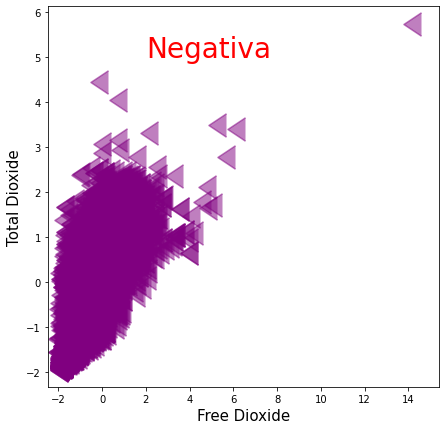

In [40]:
# Código de visualización
plt.figure(figsize = (7,7))
plt.scatter(grados["free sulfur dioxide"], grados["total sulfur dioxide"], marker = 8, s = 550, color = "purple", alpha = 0.5)
plt.xlabel("Free Dioxide", fontsize = 15)
plt.ylabel("Total Dioxide", fontsize = 15)
plt.text(2.0, 5.0, "Negativa", fontsize = 28, color = "red")
plt.show()

In [41]:
from numpy.linalg import eig

In [42]:
#Calculo de valores eigen
valores, vectores = eig(grados.cov())

In [43]:
vector_azul = vectores[:,0]
vector_rojo = vectores[:,1]

print("Eingenvector Rojo", vector_rojo, "Eigenvalor", valores[1])
print("Eingenvector Azul", vector_azul, "Eigenvalor", valores[0])

Eingenvector Rojo [-0.70710678 -0.70710678] Eigenvalor 1.7211990034969629
Eingenvector Azul [-0.70710678  0.70710678] Eigenvalor 0.2791088782764356


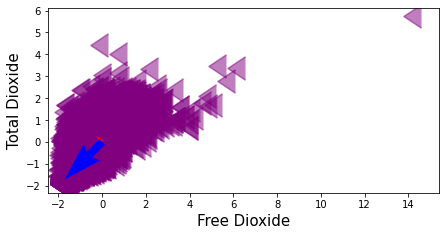

In [44]:
# Código de visualización
plt.figure(figsize = (7,7))
plt.axes().set_aspect("equal")

# Graficando los datos
plt.scatter(grados["free sulfur dioxide"], grados["total sulfur dioxide"], marker = 8, s = 550, color = "purple", alpha = 0.5)

#Graficando los Eigenvectores
plt.quiver(0,0,
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="red",angles="xy",scale_units="xy",scale=1,width=0.02
          )

plt.quiver(0,0,
           vector_rojo[0]/abs(vector_rojo[0])*valores[1],
           vector_rojo[1]/abs(vector_rojo[1])*valores[1],
           color="blue",angles="xy",scale_units="xy",scale=1,width=0.02
          )
        
plt.xlabel("Free Dioxide", fontsize = 15)
plt.ylabel("Total Dioxide", fontsize = 15)
plt.show()

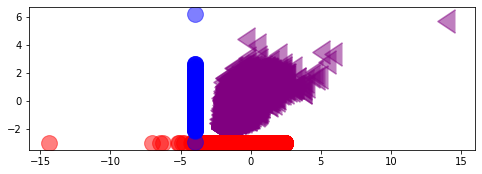

In [45]:
# Proyección de los datos
proyectados = pd.DataFrame(grados.values @ vectores.T,
              columns = ["free sulfur dioxide","total sulfur dioxide"])

# Código de visualización
plt.figure(figsize = (8,8))
plt.axes().set_aspect("equal")

# Datos rotados
plt.scatter(grados["free sulfur dioxide"], grados["total sulfur dioxide"], marker = 8, s = 550, color = "purple", alpha=0.5)

# Proyección de los datos en 1 dimensión
plt.scatter(proyectados["free sulfur dioxide"],[-3]*len(proyectados["total sulfur dioxide"]), s=250, color = "red", alpha = 0.5)
plt.scatter([-4]*len(proyectados["total sulfur dioxide"]), proyectados["total sulfur dioxide"], s = 250, color = "blue", alpha = 0.5)
plt.show()

In [46]:
# Selección de componentes
from sklearn.decomposition import PCA

In [47]:
pca = PCA()
grados = pca.fit_transform(grados)

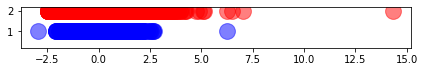

Varianza explicada por cada componente:  [1.721199   0.27910888]
Proporción de varianza explicada por cada componente:  [0.86046704 0.13953296]


In [48]:
plt.figure(figsize=(7,7))
plt.axes().set_aspect("equal")
plt.scatter(grados[:,0],[2]*grados[:,0].size, s=250,color="red",alpha=0.5)
plt.scatter(grados[:,1],[1]*grados[:,1].size, s=250,color="blue",alpha=0.5)
plt.ylim((0.2 , 2.2))
plt.show()

print("Varianza explicada por cada componente: ", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente: ", pca.explained_variance_ratio_)

KMeans
===

In [49]:
from sklearn.cluster import KMeans
import plotly.express as px

In [50]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [51]:
#columnas a usar
cols_to_use = ["free sulfur dioxide", "total sulfur dioxide", "alcohol"]

In [52]:
x = wine.loc[:,cols_to_use].values
x

array([[ 45. , 170. ,   8.8],
       [ 14. , 132. ,   9.5],
       [ 30. ,  97. ,  10.1],
       ...,
       [ 29. ,  40. ,  11. ],
       [ 32. ,  44. ,  10.2],
       [ 18. ,  42. ,  11. ]])

In [53]:
x = StandardScaler().fit_transform(x)
x

array([[ 0.81556531,  0.9599756 , -1.41855821],
       [-0.93110705,  0.28761754, -0.83161516],
       [-0.02959874, -0.33165963, -0.32852111],
       ...,
       [-0.08594301, -1.34019672,  0.42611996],
       [ 0.0830898 , -1.26942219, -0.2446721 ],
       [-0.70572997, -1.30480946,  0.42611996]])

In [54]:
x = np.around(x,1)

In [55]:
np.nan_to_num(x)

array([[ 0.8,  1. , -1.4],
       [-0.9,  0.3, -0.8],
       [-0. , -0.3, -0.3],
       ...,
       [-0.1, -1.3,  0.4],
       [ 0.1, -1.3, -0.2],
       [-0.7, -1.3,  0.4]])

In [56]:
pca = PCA(n_components  = 2)
principalComponents = pca.fit_transform(x)

In [57]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

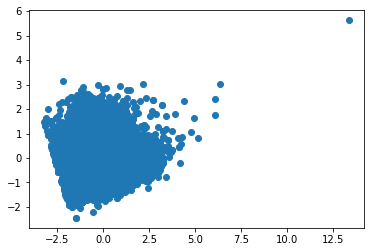

In [58]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [59]:
km = KMeans( n_clusters=3  ).fit(pcadf)

In [60]:
pcadf

,c1,c2
0,1.686227,-0.870981
1,-0.103537,-0.973857
2,-0.095369,-0.335065
3,1.569303,0.035460
4,1.569303,0.035460
...,...,...
6492,-0.807245,-0.206967
6493,-0.623034,0.514199
6494,-1.078325,0.102876
6495,-0.736921,-0.393295


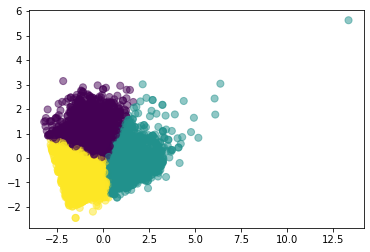

In [61]:
plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

Al haber hecho uso de las columnas FREE SULFUR DIOXIDE, TOTAL SULFUR DIOXIDE, ALCOHOL
+ En la parte amarilla se puede comprender que es un tipo de vino que tienen poco dioxido (tomando en cuenta ambos) y poco alcohol
+ En la parte morada se puede comprender que es un tipo de vino que tienen mas alcohol y una parte equilibrada en el dioxido
+ En la parte cian se puede comprender que es un tipo de vino que su nivel de alcohol y el dioxido no se encuentra en niveles muy altos, tomando en cuenta el valor más externo que se tiene

In [62]:
wine["cluster"] = km.labels_

Se agrega la columna de cluster, que indica la forma en la que están distribuidos los puntos generados con el KMeans

In [63]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


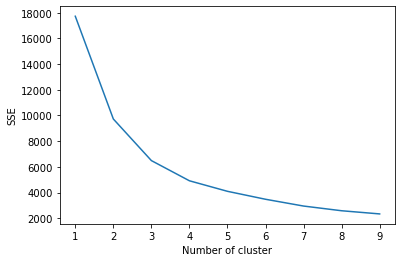

In [64]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pcadf)    
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

En esta parte podemos garantizar que entre 3 y 4 cluster es una buena manera para dividir la información

In [65]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

array([[ 0.88493237,  0.29596102],
       [ 0.91132106,  0.17226613],
       [-0.477127  ,  0.87795333]])

In [68]:
fig = px.scatter(principalComponents, x=0, y=1, color=wine['cluster'])

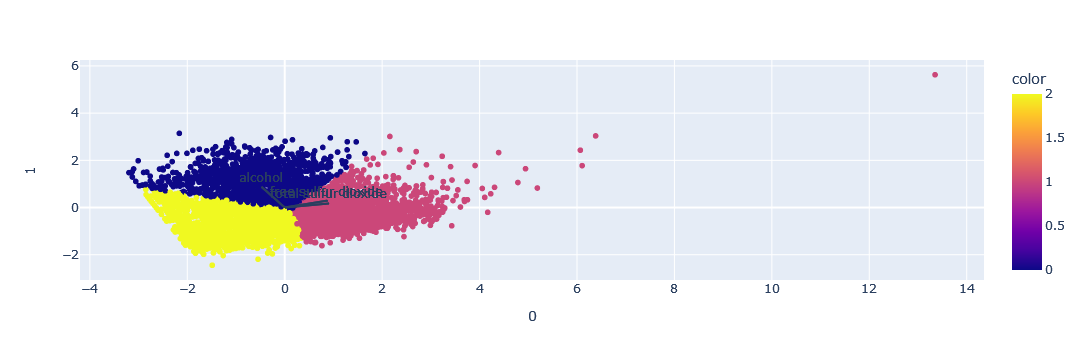

In [70]:
for i, feature in enumerate(cols_to_use):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

Se eliminarán las columnas Free Sulfur Dioxide y Total Sulfur Dioxide, porque fueron las columnas que se utilizaron en la realización del PCA anteriormente

In [62]:
wine.drop(["free sulfur dioxide", "total sulfur dioxide"], axis = 1, inplace = True)

In [63]:
def Answer(r):
    if r["quality"] >= 5:
        return 1
    else:
        return 0

In [64]:
wine["answer"] = wine.apply(lambda r: Answer(r), axis=1)

In [65]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,cluster,answer
0,white,7.0,0.270,0.36,20.7,0.045,1.00100,3.00,0.45,8.8,6,2,1
1,white,6.3,0.300,0.34,1.6,0.049,0.99400,3.30,0.49,9.5,6,1,1
2,white,8.1,0.280,0.40,6.9,0.050,0.99510,3.26,0.44,10.1,6,1,1
3,white,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.40,9.9,6,2,1
4,white,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.40,9.9,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.58,10.5,5,1,1
6493,red,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,NaN,11.2,6,0,1
6494,red,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.75,11.0,6,1,1
6495,red,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.71,10.2,5,1,1


Se eliminará la columna de quality

In [66]:
wine.drop(["quality"], axis = 1, inplace = True)

In [67]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,cluster,answer
0,white,7.0,0.270,0.36,20.7,0.045,1.00100,3.00,0.45,8.8,2,1
1,white,6.3,0.300,0.34,1.6,0.049,0.99400,3.30,0.49,9.5,1,1
2,white,8.1,0.280,0.40,6.9,0.050,0.99510,3.26,0.44,10.1,1,1
3,white,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.40,9.9,2,1
4,white,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.40,9.9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.58,10.5,1,1
6493,red,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,NaN,11.2,0,1
6494,red,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.75,11.0,1,1
6495,red,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.71,10.2,1,1


Entrenamientos MLS
===

Neuronal Network
---

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [104]:
X = wine[features].values
Y = wine["alcohol"].values

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=0)

In [108]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [109]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=3000)

# Training the model on the training data and labels
NN.fit(x_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(x_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Árbol de decisiones
---

In [90]:
from sklearn import tree

In [91]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [94]:
tree_one = tree_one.fit( X_train , Y_train )

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').